pip install gymnasium \
pip install gymnasium[box2d]

In [1]:
import gymnasium as gym
import time 
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode = "ansi")
"""
Action Space:
0: Move left
1: Move down
2: Move right
3: Move up

Observation Space:
current_row * nrows + current_col
4 * 4 = 16

Rewards:
Reach goal: +1
Reach hole: 0
Reach frozen: 0

"""
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



In [3]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(16)


In [4]:
dict_move = { 0: "Move left", 1: "Move down", 2: "Move right", 3: "Move up"   }

In [5]:
class Qlearning:
    def __init__(self,epsilon=0.5, alpha=0.5, gamma=0.95, epsilon_decay = 0.001, alpha_decay = 0.999):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.epsilon_decay = epsilon_decay
        self.alpha_decay = alpha_decay

    def game_begin(self):
        #print(FR_player.alpha)
        # linear epsilson decay
        self.epsilon = max(self.epsilon - self.epsilon_decay, 0)
        # exponential alpha decay
        self.alpha = max(self.alpha * self.alpha_decay, 0)
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.alpha -= 0.00005


    def epslion_greedy(self, state, possible_moves): #esplion greedy algorithm
        #return  action
        self.last_board = state
        if(random.random() < self.epsilon):
            move = env.action_space.sample() ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: #greedy strategy
            Q_list=[]
            # possible_moves = (0, 1, 2, 3)
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # more than 1 best option; choose among them randomly
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]


    def getQ(self, state, action): #get Q states
        if(self.Q.get((state,action))) is None:
            # initialize q-value as 0
            self.Q[(state,action)] = 0.0
        return self.Q.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update Q states using Qleanning
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(state, moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next=0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)


In [6]:
FR_player = Qlearning()
train_episodes = 2000
training_rewards = [] 
pos_mov = [0, 1, 2, 3]

for episode in range(train_episodes):
    #print(episode)
    state = env.reset()[0]
    total_training_rewards = 0
    FR_player.game_begin()
    env.reset()
    done = False
    while not done:
        move = FR_player.epslion_greedy(state,pos_mov)
        new_state, reward, done, trunc, info = env.step(move)
        total_training_rewards += reward
        state = new_state
        FR_player.updateQ(reward, state, pos_mov)
        if done:
            break
    training_rewards.append(total_training_rewards)

print("Number of trainings: ", train_episodes)
print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

Number of trainings:  2000
Training score over time: 0.607


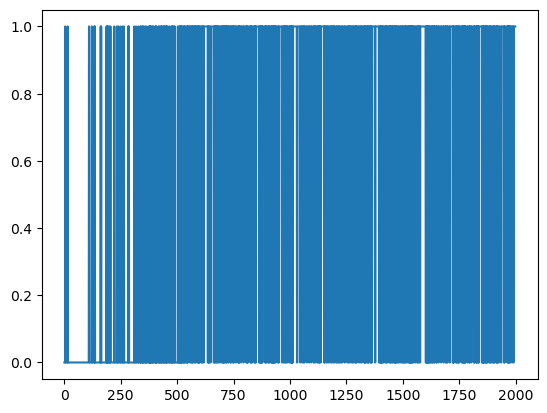

In [7]:
plt.plot(training_rewards)

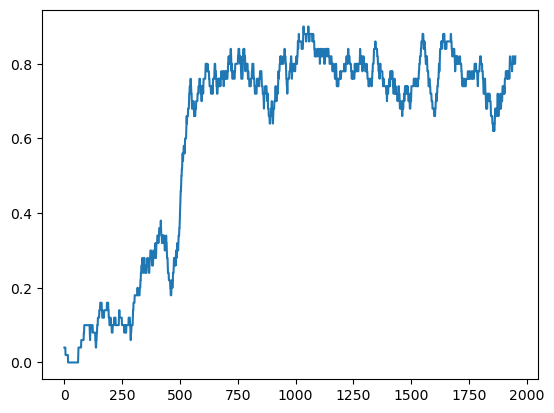

In [8]:
fiftyDayAverage = []
for i in range(50,len(training_rewards)+1):
    fiftyDayAverage.append(np.average(training_rewards[i-50:i]))
plt.plot(fiftyDayAverage)

In [9]:
env.close()